Tweet categories:
1: Negatief
2: Negatief/neutraal
3: Neutraal
4: Negatief
5: Positief
6: Positief
7: Negatief/neutraal
8: Negatief

## Code for retrieving tweets

```python
import pandas as pd
import tweepy
import config
import csv

client = tweepy.Client(bearer_token=config.BEARER_TOKEN)
csvFile = open('result.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)
for tweet in client.search_recent_tweets(query="Microsoft lang:en -is:retweet", max_results=10).data:
    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.text.encode('utf-8')])
    
csvFile.close()
```

0    How is it possible for microsoft to do absolut...
1           Microsoft really paid bethesda for nothing
2    Educational Premiums Available!\nDm to avail.\...
3    @splitend89 Microsoft better break out the che...
4    Sony can learn a lot from Microsoft and how th...
5    It sucks to see the delays but great to see th...
6    @theRealJayDub2 @PostUp_bbb Why work when you ...
7                   microsoft? more like microsoftcock
Name: text, dtype: object


<AxesSubplot:>

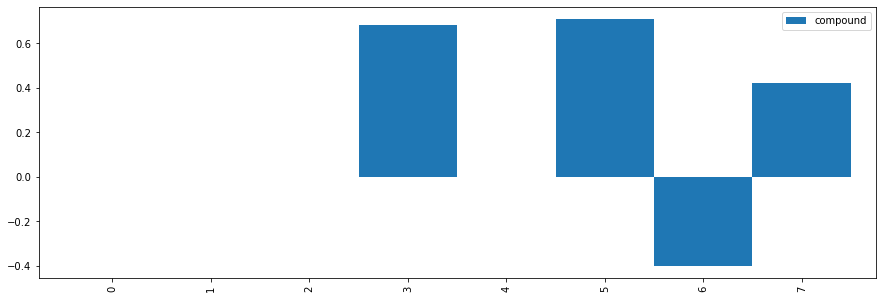

In [12]:
import pandas as pd
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv('result.csv', header=None, dtype = str,names=["text", "category"])

print(df['text'])
analyzer = SentimentIntensityAnalyzer()
tweetsWithSent = []

for t in df.text:
    ps = analyzer.polarity_scores(t)
    tweetsWithSent.append({'text': t, 'compound': ps['compound']})

tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)

<AxesSubplot:>

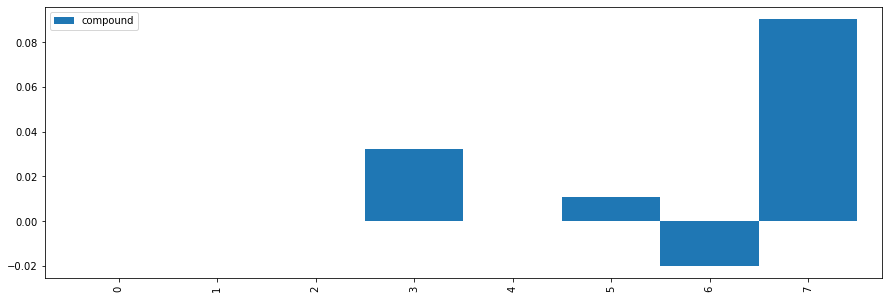

In [5]:
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from ast import literal_eval
df = pd.read_csv('result.csv', header=None, dtype = str,names=["text"])

analyzer = SentimentIntensityAnalyzer()
tweetsWithSent = []
for t in df.text:
    words = t.split()
    sentiment = 0
    for word in words:
        ps = analyzer.polarity_scores(word)
        sentiment += ps['compound']
       
    tweetsWithSent.append({'text': t, 'compound': sentiment/len(words)})

# Plot the result of analysis
# - A high compound can be regarderd as a highly positive tweet (1 being the highest posibile score)
# - A low compound can be regarded as a highly negative tweet (-1 being the lowest possibile score)
# - A compound score of 0 can be regarded as a highly neatral tweet
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)

<AxesSubplot:>

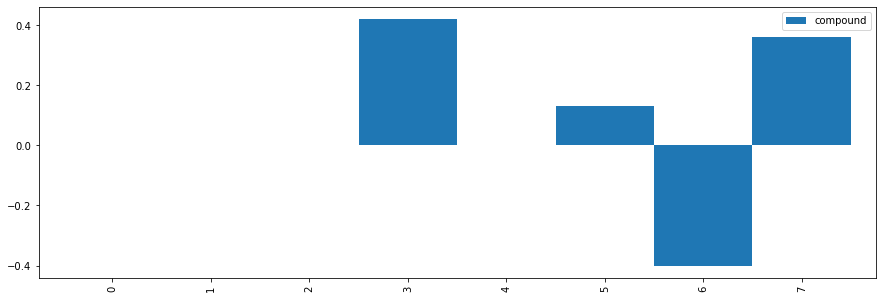

In [6]:
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from ast import literal_eval
df = pd.read_csv('result.csv', header=None, dtype = str,names=["text"])

analyzer = SentimentIntensityAnalyzer()

tweetsWithSent = []
for t in df.text:
    words = t.split()
    wordsWithSentiment = []
    sentiment = 0
    for word in words:
        ps = analyzer.polarity_scores(word)
        if ps['compound'] != 0:
            wordsWithSentiment.append(word)
            sentiment += ps['compound']
    
    tweetsWithSent.append({'text': t, 'compound': sentiment/(len(wordsWithSentiment) if len(wordsWithSentiment) != 0 else 1)})

# Plot the result of analysis
# - A high compound can be regarderd as a highly positive tweet (1 being the highest posibile score)
# - A low compound can be regarded as a highly negative tweet (-1 being the lowest possibile score)
# - A compound score of 0 can be regarded as a highly neatral tweet
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)